In [15]:
from qdisk.model import Keplerian_velocity
from qdisk.classes import FitsImage
import eDiskplot as eplot
from qdisk.utils import is_within
from qdisk.plot import ChannelMap
import analysis_utils as au
from eDisk_source_dict import source_dict
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from astropy.visualization import ImageNormalize
import matplotlib.patheffects as pe
# %matplotlib widget
%load_ext autoreload
%autoreload 2

source = "L1489IRS"
config = "SBLB"
line = "12CO"
robust = 1.0
center_coord = source_dict[source]["radec"]
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]
distance = source_dict[source]["distance"]
vsys = source_dict[source]["v_sys"]

imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


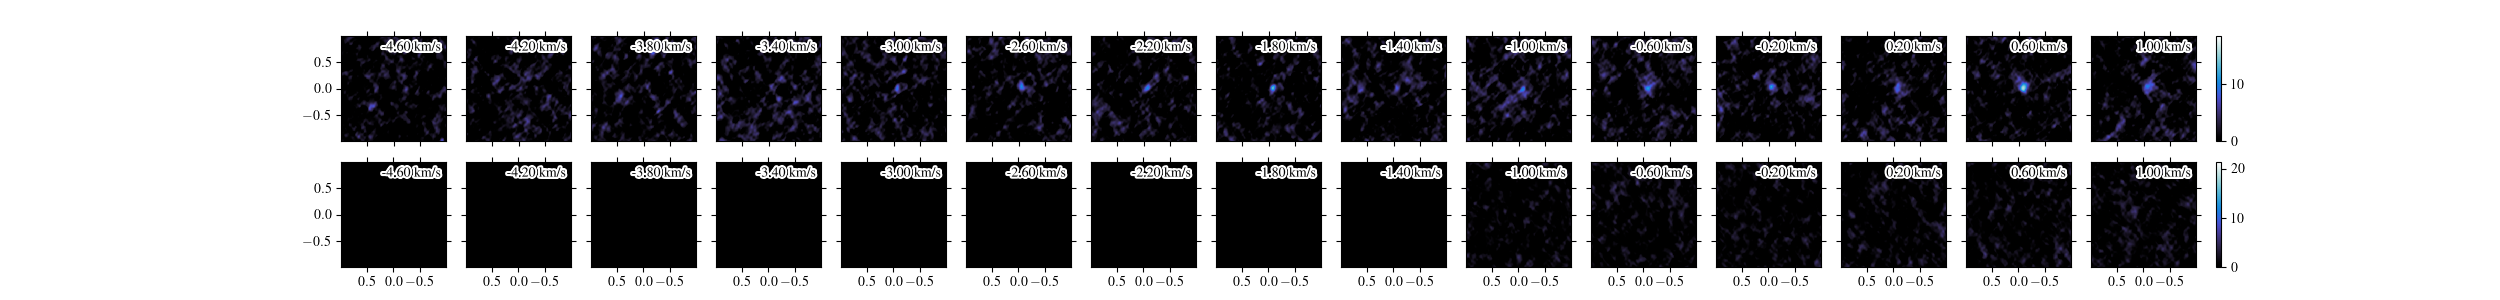

In [42]:
# SO and C18O
rmax = 1
vmin = vsys - 12
vmax = vsys - 6

robust = 1.0

fig = plt.figure(figsize=(25, 3))

# SO
line = "SO"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.2.image.fits")
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=None, downsample=(1, 2))
norm = ImageNormalize(cube.data*1e3, vmin=0.0)
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(vmin, vmax), downsample=(1, 2))
cube.shift_phasecenter_toward(center_coord)
imgrid = ImageGrid(fig, rect=211, nrows_ncols=(1, cube.nchan), axes_pad=0.2, share_all=False, cbar_mode="single")

# npanel = cube.nchan
vaxis = cube.v

for i, v in enumerate(cube.v):
    ax = imgrid[i]
    im = ax.pcolorfast(cube.x, cube.y, cube.data[i]*1e3, cmap=eplot.cmap["M0"], norm=norm)

    ax.annotate(
        text="{:.2f} km/s".format(v),
        xy=(0.95, 0.95),
        ha="right",
        va="top",
        xycoords="axes fraction",
        color="black",
        path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
    )
    ax.tick_params(labelbottom=False)

# ax.invert_xaxis()

imgrid.cbar_axes[0].colorbar(im)

# C18O

line = "C18O"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.2.image.fits")
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=None, downsample=(1, 2))
norm = ImageNormalize(cube.data*1e3, vmin=0.0)
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(vmin, vmax), downsample=(1, 2))
cube.shift_phasecenter_toward(center_coord)
imgrid = ImageGrid(fig, rect=212, nrows_ncols=(1, vaxis.size), axes_pad=0.2, share_all=False, cbar_mode="single")


for i, v in enumerate(vaxis):
    ax = imgrid[i]

    if np.round(v, decimals=1) < np.round(cube.v.min(), decimals=1):
        im = ax.pcolorfast(cube.x, cube.y, np.zeros_like(cube.data[0]), cmap=eplot.cmap["M0"], norm=norm)
    else:
        im = ax.pcolorfast(cube.x, cube.y, cube.data[np.isclose(v, cube.v, atol=0.01)].squeeze()*1e3, cmap=eplot.cmap["M0"], norm=norm)

    ax.annotate(
        text="{:.2f} km/s".format(v),
        xy=(0.95, 0.95),
        ha="right",
        va="top",
        xycoords="axes fraction",
        color="black",
        path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
    )

    ax.invert_xaxis()
imgrid.cbar_axes[0].colorbar(im)

fig.savefig(au.figurepath + "SO_C18O_channelmap_comparison_blue_high.pdf", bbox_inches="tight", pad_inches=0.01)



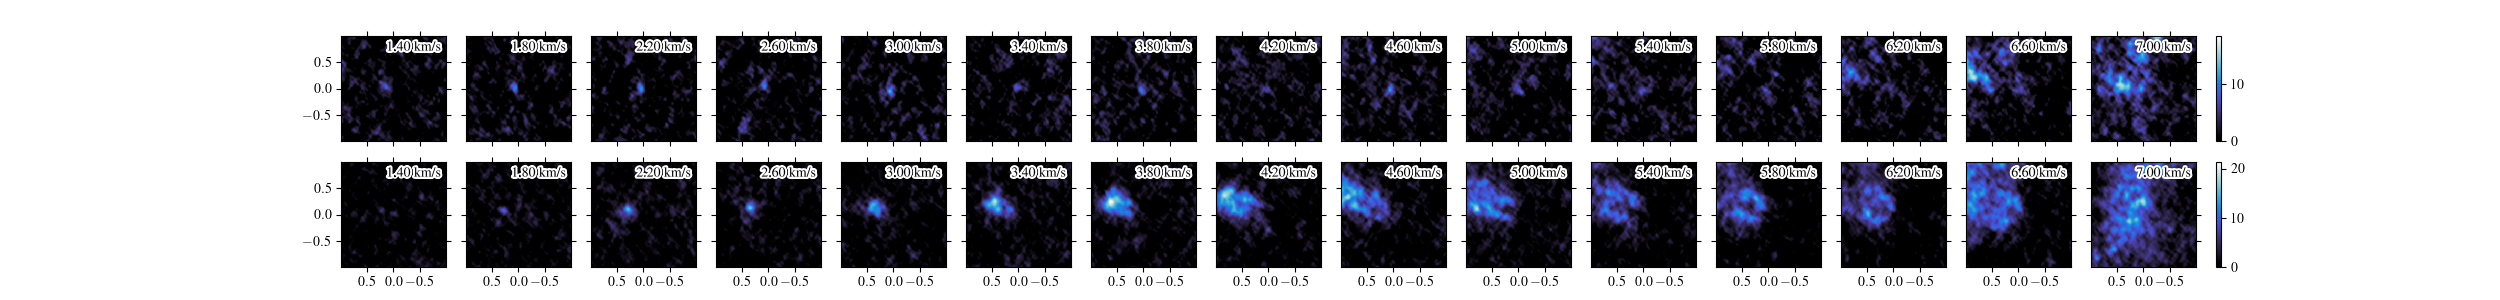

In [45]:
# SO and C18O
rmax = 1
vmin = vsys - 6
vmax = vsys - 0

robust = 1.0

fig = plt.figure(figsize=(25, 3))

# SO
line = "SO"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.2.image.fits")
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=None, downsample=(1, 2))
norm = ImageNormalize(cube.data*1e3, vmin=0.0)
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(vmin, vmax), downsample=(1, 2))
cube.shift_phasecenter_toward(center_coord)
imgrid = ImageGrid(fig, rect=211, nrows_ncols=(1, cube.nchan), axes_pad=0.2, share_all=False, cbar_mode="single")

# npanel = cube.nchan
vaxis = cube.v

for i, v in enumerate(cube.v):
    ax = imgrid[i]
    im = ax.pcolorfast(cube.x, cube.y, cube.data[i]*1e3, cmap=eplot.cmap["M0"], norm=norm)

    ax.annotate(
        text="{:.2f} km/s".format(v),
        xy=(0.95, 0.95),
        ha="right",
        va="top",
        xycoords="axes fraction",
        color="black",
        path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
    )
    ax.tick_params(labelbottom=False)

    ax.invert_xaxis()

imgrid.cbar_axes[0].colorbar(im)

# C18O

line = "C18O"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.2.image.fits")
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=None, downsample=(1, 2))
norm = ImageNormalize(cube.data*1e3, vmin=0.0)
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(vmin, vmax), downsample=(1, 2))
cube.shift_phasecenter_toward(center_coord)
imgrid = ImageGrid(fig, rect=212, nrows_ncols=(1, vaxis.size), axes_pad=0.2, share_all=False, cbar_mode="single")


for i, v in enumerate(vaxis):
    ax = imgrid[i]

    if np.round(v, decimals=1) < np.round(cube.v.min(), decimals=1):
        im = ax.pcolorfast(cube.x, cube.y, np.zeros_like(cube.data[0]), cmap=eplot.cmap["M0"], norm=norm)
    else:
        im = ax.pcolorfast(cube.x, cube.y, cube.data[np.isclose(v, cube.v, atol=0.01)].squeeze()*1e3, cmap=eplot.cmap["M0"], norm=norm)

    ax.annotate(
        text="{:.2f} km/s".format(v),
        xy=(0.95, 0.95),
        ha="right",
        va="top",
        xycoords="axes fraction",
        color="black",
        path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
    )

    ax.invert_xaxis()
imgrid.cbar_axes[0].colorbar(im)

fig.savefig(au.figurepath + "SO_C18O_channelmap_comparison_blue_low.pdf", bbox_inches="tight", pad_inches=0.01)



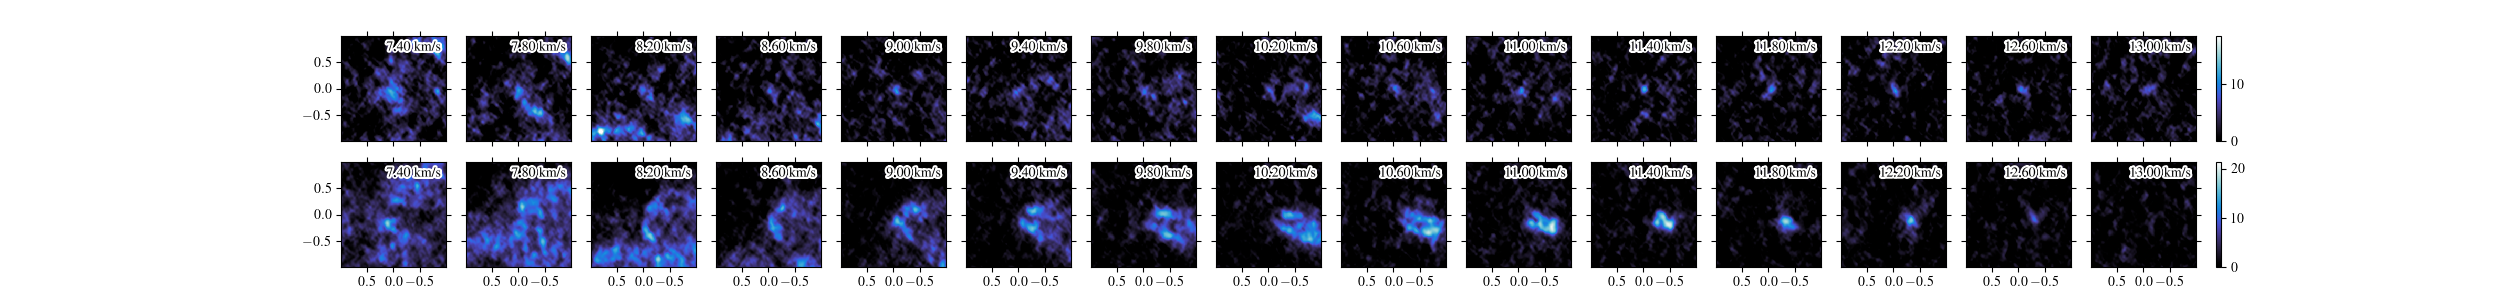

In [47]:
# SO and C18O
rmax = 1
vmin = vsys + 0
vmax = vsys + 6

robust = 1.0

fig = plt.figure(figsize=(25, 3))

# SO
line = "SO"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.2.image.fits")
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=None, downsample=(1, 2))
norm = ImageNormalize(cube.data*1e3, vmin=0.0)
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(vmin, vmax), downsample=(1, 2))
cube.shift_phasecenter_toward(center_coord)
imgrid = ImageGrid(fig, rect=211, nrows_ncols=(1, cube.nchan), axes_pad=0.2, share_all=False, cbar_mode="single")

# npanel = cube.nchan
vaxis = cube.v

for i, v in enumerate(cube.v):
    ax = imgrid[i]
    im = ax.pcolorfast(cube.x, cube.y, cube.data[i]*1e3, cmap=eplot.cmap["M0"], norm=norm)

    ax.annotate(
        text="{:.2f} km/s".format(v),
        xy=(0.95, 0.95),
        ha="right",
        va="top",
        xycoords="axes fraction",
        color="black",
        path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
    )
    ax.tick_params(labelbottom=False)

    ax.invert_xaxis()

imgrid.cbar_axes[0].colorbar(im)

# C18O

line = "C18O"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.2.image.fits")
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=None, downsample=(1, 2))
norm = ImageNormalize(cube.data*1e3, vmin=0.0)
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(vmin, vmax), downsample=(1, 2))
cube.shift_phasecenter_toward(center_coord)
imgrid = ImageGrid(fig, rect=212, nrows_ncols=(1, vaxis.size), axes_pad=0.2, share_all=False, cbar_mode="single")


for i, v in enumerate(vaxis):
    ax = imgrid[i]

    if np.round(v, decimals=1) < np.round(cube.v.min(), decimals=1):
        im = ax.pcolorfast(cube.x, cube.y, np.zeros_like(cube.data[0]), cmap=eplot.cmap["M0"], norm=norm)
    else:
        im = ax.pcolorfast(cube.x, cube.y, cube.data[np.isclose(v, cube.v, atol=0.01)].squeeze()*1e3, cmap=eplot.cmap["M0"], norm=norm)

    ax.annotate(
        text="{:.2f} km/s".format(v),
        xy=(0.95, 0.95),
        ha="right",
        va="top",
        xycoords="axes fraction",
        color="black",
        path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
    )

    ax.invert_xaxis()
imgrid.cbar_axes[0].colorbar(im)

fig.savefig(au.figurepath + "SO_C18O_channelmap_comparison_red_low.pdf", bbox_inches="tight", pad_inches=0.01)



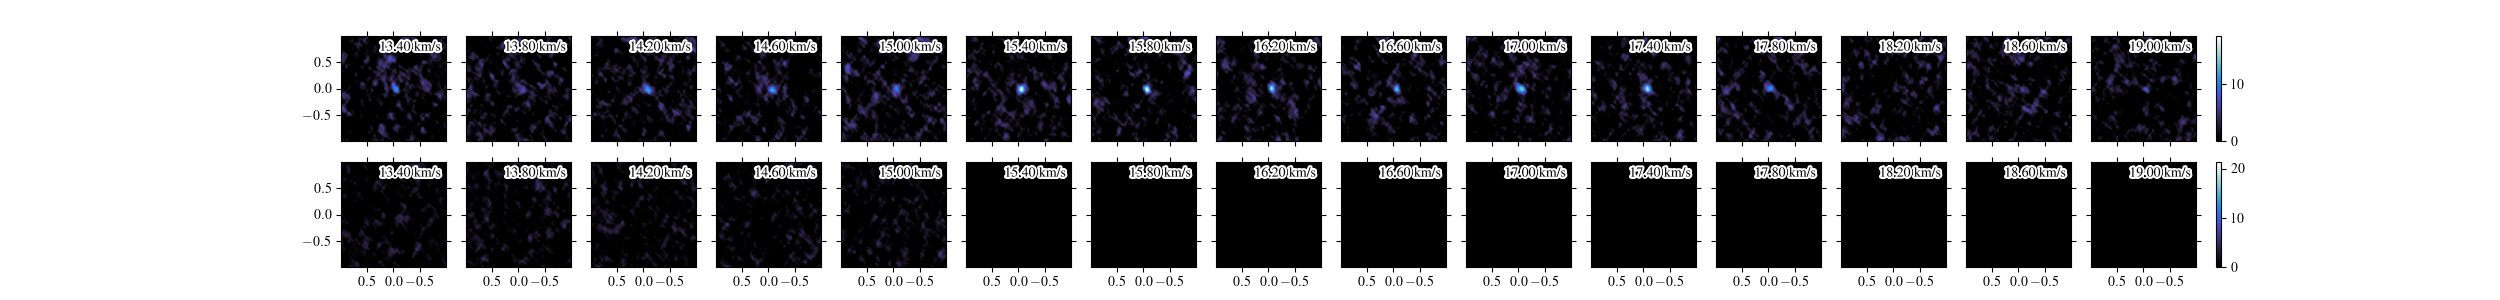

In [49]:
# SO and C18O
rmax = 1
vmin = vsys + 6
vmax = vsys + 12

robust = 1.0

fig = plt.figure(figsize=(25, 3))

# SO
line = "SO"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.2.image.fits")
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=None, downsample=(1, 2))
norm = ImageNormalize(cube.data*1e3, vmin=0.0)
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(vmin, vmax), downsample=(1, 2))
cube.shift_phasecenter_toward(center_coord)
imgrid = ImageGrid(fig, rect=211, nrows_ncols=(1, cube.nchan), axes_pad=0.2, share_all=False, cbar_mode="single")

# npanel = cube.nchan
vaxis = cube.v

for i, v in enumerate(cube.v):
    ax = imgrid[i]
    im = ax.pcolorfast(cube.x, cube.y, cube.data[i]*1e3, cmap=eplot.cmap["M0"], norm=norm)

    ax.annotate(
        text="{:.2f} km/s".format(v),
        xy=(0.95, 0.95),
        ha="right",
        va="top",
        xycoords="axes fraction",
        color="black",
        path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
    )
    ax.tick_params(labelbottom=False)

    ax.invert_xaxis()

imgrid.cbar_axes[0].colorbar(im)

# C18O

line = "C18O"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust).replace(".image.fits", "_dv0.2.image.fits")
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=None, downsample=(1, 2))
norm = ImageNormalize(cube.data*1e3, vmin=0.0)
cube = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax), vlim=(vmin, vmax), downsample=(1, 2))
cube.shift_phasecenter_toward(center_coord)
imgrid = ImageGrid(fig, rect=212, nrows_ncols=(1, vaxis.size), axes_pad=0.2, share_all=False, cbar_mode="single")


for i, v in enumerate(vaxis):
    ax = imgrid[i]

    if np.round(v, decimals=1) > np.round(cube.v.max(), decimals=1):
        im = ax.pcolorfast(cube.x, cube.y, np.zeros_like(cube.data[0]), cmap=eplot.cmap["M0"], norm=norm)
    else:
        im = ax.pcolorfast(cube.x, cube.y, cube.data[np.isclose(v, cube.v, atol=0.01)].squeeze()*1e3, cmap=eplot.cmap["M0"], norm=norm)

    ax.annotate(
        text="{:.2f} km/s".format(v),
        xy=(0.95, 0.95),
        ha="right",
        va="top",
        xycoords="axes fraction",
        color="black",
        path_effects=[pe.Stroke(linewidth=3, foreground="white"), pe.Normal()],
    )

    ax.invert_xaxis()
imgrid.cbar_axes[0].colorbar(im)

fig.savefig(au.figurepath + "SO_C18O_channelmap_comparison_red_high.pdf", bbox_inches="tight", pad_inches=0.01)

